# Advanced Linear Regression Assignment for House Price Predictions

 1. **Importing Required Libraries for the Assignment**

In [1]:
# For Data Processing
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, scale, MinMaxScaler, PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

2. **Importing the required dataset (day.csv) into the Jupyter Notebook**

In [2]:
housedata = pd.read_csv('train.csv')

3. **Reading the top 5 Rows of the dataset**

In [3]:
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


4. **Getting the Shape of the dataset**

In [4]:
housedata.shape

(1460, 81)

5. **Getting the Info about the dataset**

In [5]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

6. **Getting the list of columns from the dataset**

In [6]:
housedata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

7. **Getting to know if any null values are there in the dataset**

In [7]:
nv=housedata.isnull().sum().sort_values(ascending=False)
nv.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

8. **Imputing the Null values with required values for categorical columns**

In [8]:
housedata['Alley'].fillna('No alley access', inplace=True)
housedata['BsmtQual'].fillna('No Basement', inplace=True)
housedata['BsmtCond'].fillna('No Basement', inplace=True)
housedata['BsmtExposure'].fillna('No Basement', inplace=True)
housedata['BsmtFinType1'].fillna('No Basement', inplace=True)
housedata['BsmtFinType2'].fillna('No Basement', inplace=True)
housedata['FireplaceQu'].fillna('No Fireplace', inplace=True)
housedata['GarageType'].fillna('No Garage', inplace=True)
housedata['GarageFinish'].fillna('No Garage', inplace=True)
housedata['GarageQual'].fillna('No Garage', inplace=True)
housedata['GarageCond'].fillna('No Garage', inplace=True)
housedata['PoolQC'].fillna('No Pool', inplace=True)
housedata['Fence'].fillna('No Fence', inplace=True)
housedata['MiscFeature'].fillna('None', inplace=True)
housedata['MasVnrType'].fillna('None', inplace=True)

9. **Chekcing to know if any null values are there in the dataset**

In [9]:
nv=housedata.isnull().sum().sort_values(ascending=False)
nv.head(20)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
Id                0
GarageFinish      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
dtype: int64

10. **Imputing the Null values with required values for Numerical columns**

In [10]:
housedata['LotFrontage'].fillna(housedata['LotFrontage'].median(), inplace=True)
housedata['MasVnrArea'].fillna(0, inplace=True)
housedata['GarageYrBlt'].fillna(3333, inplace=True)

11. **Getting to know if any null values are there in the dataset**

In [11]:
nv=housedata.isnull().sum().sort_values(ascending=False)
nv.head(20)

Electrical      1
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

12. **Imputing the Null values with required values for 'Electrical' column**

In [12]:
housedata = housedata[housedata['Electrical'].notna()]

13. **Getting to know if any null values are there in the dataset**

nv=housedata.isnull().sum().sort_values(ascending=False)
nv.head(20)

14. **Getting the info about the dataset after filling null values**

In [13]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

15. **Dropping 'Id' column**

In [14]:
housedata = housedata.drop(columns=['Id'],axis=1)

16. **Checking the shape of the dataset now**

In [15]:
housedata.shape

(1459, 80)

17. **Plotting a heatmap aganist all the variables**

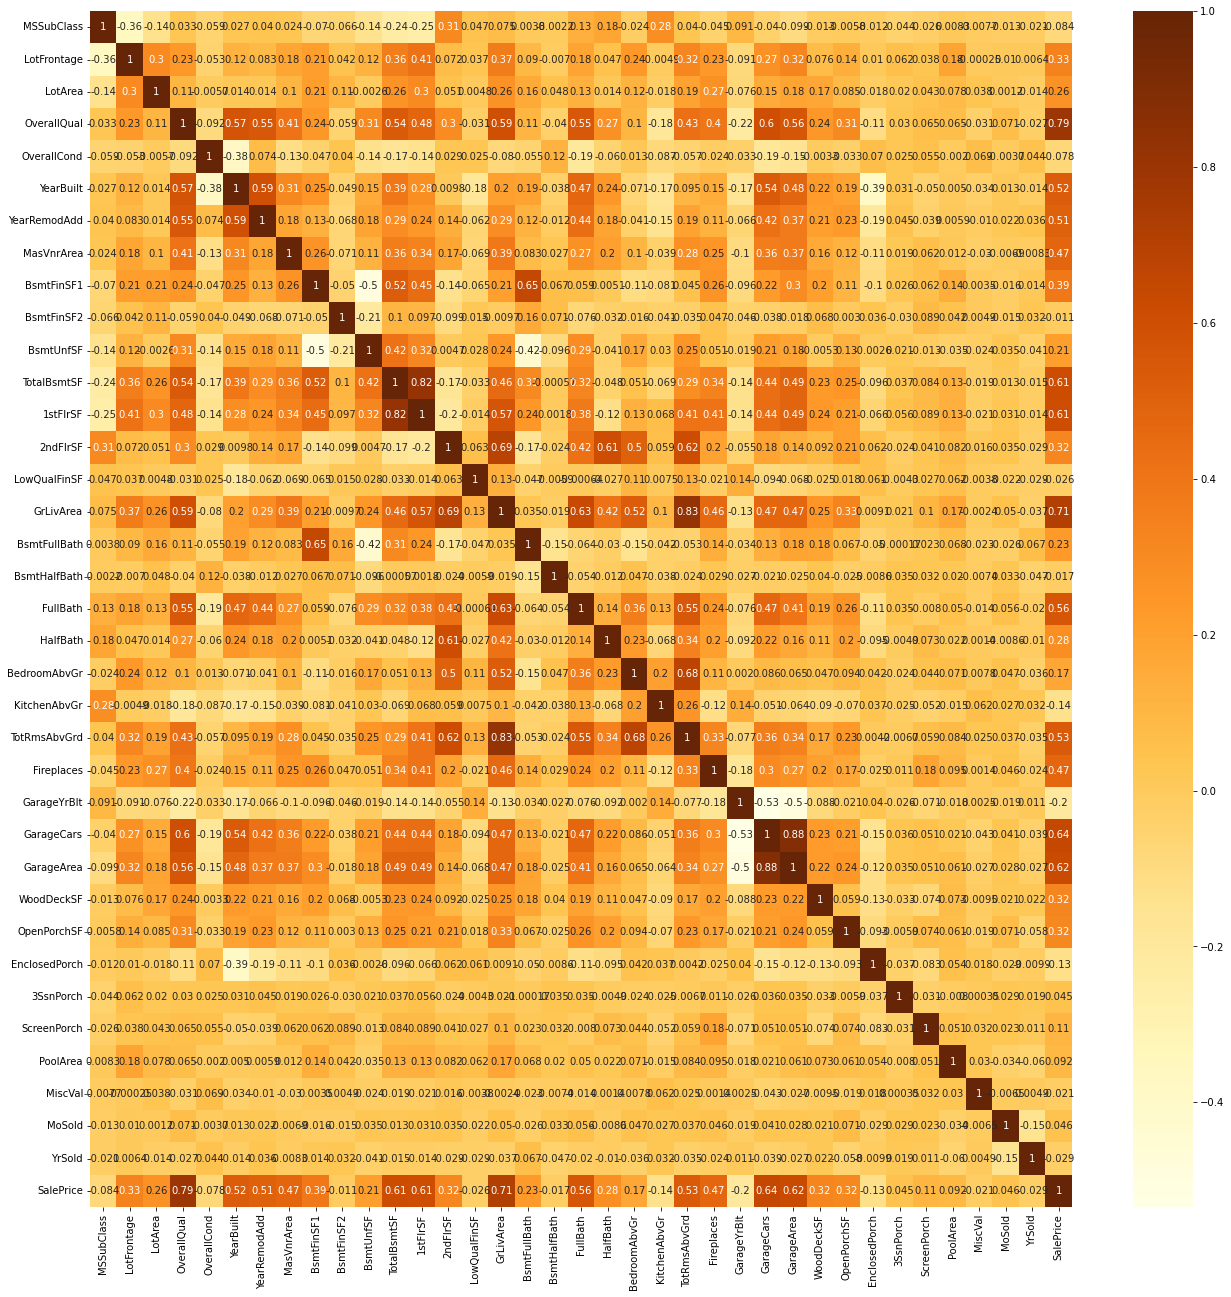

In [16]:
plt.figure(figsize=(22,22))
sns.heatmap(housedata.corr(),annot=True, cmap="YlOrBr")
plt.show()

### Dividing into categorical and Numerical sets

In [17]:
#categorical_vars = pd.concat([Subclass, Zoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighbourhood, Condition, Dwellingtype, HouseStyle, RoofStyle, RoofMaterial, Exterior, MasVnrType, Foundation, Bsmtheight, Bsmtcond, BsmtExp, BsmtFinType, Heating, CentralAir, Electrical, Functional, GarageType, GarageFinish, PavedDrive, SaleType, SaleCondition],axis=1)

In [18]:
#Numerical_vars = housedata[['LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','ScreenPorch','PoolArea']]

18. **spliting the data into X and y**

In [19]:

X = housedata.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']] # predictors in variable X

y = housedata['SalePrice'] # response variable in Y

19. **subset all categorical variables for creation of dummy variables**

In [20]:
housedata_categorical = X.select_dtypes(include=['object'])
housedata_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


20. **converting into dummies - one hot encoding**

In [21]:
# 
housedata_dummies = pd.get_dummies(housedata_categorical, drop_first=True)
housedata_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


21. **Dropping categorical columns after creating dummies**

In [22]:
X = X.drop(list(housedata_categorical.columns), axis=1)

22. **Concating dummy variables with X**

In [23]:
X = pd.concat([X, housedata_dummies], axis=1)

23. **Scaling the features for regression (Ridge and Lasso)**

In [24]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

24. **Spliting into train and test dataset**

In [25]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

25. **Instantiating Linear Regression and for fitting a line**

In [26]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

26. **Printing the coefficients and intercept**

In [27]:
print(lm.intercept_)
print(lm.coef_)

-87173665174936.3
[-2.44135230e+03  1.76553602e+03  6.31924679e+03  8.09260218e+03
  5.98566849e+03  8.43551762e+03  2.63689866e+03  4.83307053e+03
  1.09875285e+16  3.88737618e+15  1.06475239e+16 -1.05634163e+16
 -2.07423494e+15 -2.34272743e+15 -2.60985670e+14  2.82049209e+15
  1.39450000e+03  3.09593750e+02  1.75625000e+03 -9.53687500e+02
 -3.72612500e+03 -4.61767188e+03  3.25987500e+03  2.59106250e+03
 -2.30787500e+04  3.40950000e+03  4.68437500e+03  1.33202783e+03
  4.69250000e+02  1.20492188e+03  9.44953125e+02  1.24237891e+03
  2.57727500e+05  2.45175000e+03 -1.48550000e+03 -8.51468750e+02
  8.71915625e+03  3.52108203e+03  1.25373750e+04  9.18700000e+03
  2.31838281e+03  8.25875000e+02 -1.38750000e+01  3.59468750e+02
  2.40468750e+02  1.27865625e+03  2.34200000e+03 -2.49312500e+02
  2.62734375e+03 -1.13487500e+03  2.20962500e+03 -1.45106250e+03
 -1.45996875e+03 -3.85500000e+02  1.15046875e+02 -2.61300000e+03
  4.49718750e+02  2.62500000e+01 -2.79234375e+02 -3.26062500e+02
 -1.350

# Linear Regression

27. **Calculating the R2-Score, RSS and MSE for train and test datasets (Linear Regression)**

In [28]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9407341456754522
-4.5357135111405977e+21
401707564633.0874
1.099510452474177e+34
393445215.1156586
2.5102978366990346e+31


# Ridge Regression

28. **List of alphas to tune**

In [29]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

29. **Selecting the best alpha value**

In [30]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


30. **Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised**

In [31]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.20229771e+03  1.27606595e+03  4.47194297e+03  9.87403986e+03
  5.29107263e+03  4.15613109e+03  2.96130985e+03  5.03945974e+03
  5.51756975e+03  1.17607181e+03  5.73393536e+01  6.22969016e+03
  6.73692254e+03  8.44624725e+03 -1.60073832e+03  1.18218539e+04
  2.33996379e+03 -1.35253549e+02  3.91539360e+03  1.37101707e+03
 -2.31768665e+03 -3.32013207e+03  4.36362142e+03  3.17946396e+03
  3.86864356e+02  4.76431533e+03  3.19612685e+03  1.40686586e+03
  4.57206646e+02 -1.01510182e+02  1.04031459e+03  1.11269128e+03
  3.66418330e+03  1.21970111e+02 -1.18109752e+03 -6.31750621e+02
  1.99422445e+03  5.54960434e+02  1.89857902e+03  1.52826443e+02
  2.16615380e+03  3.44425953e+02  3.20784898e+02  4.04364358e+02
 -9.44848281e+02  1.95360936e+02  2.60198067e+03  2.19134560e+02
  2.20962836e+03 -9.97110226e+02  2.07506982e+03 -1.50385528e+03
 -1.39039897e+03 -5.68329106e+02 -2.04227413e+01 -1.11525602e+03
  5.96854184e+01 -4.18706048e+02  5.57489593e+01  1.39067619e+02
 -5.29652630e+02  3.70018

31. **Calculating the R2-Score, RSS and MSE for train and test datasets (Ridge Regression)**

In [32]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9280144145215176
0.7302949227507975
487922675895.1947
653796918152.9756
477887047.88951486
1492687027.7465196


# Lasso Regression

In [33]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

32. **Selecting the best alpha value**

In [34]:
print(model_cv.best_params_)

{'alpha': 500}


33. **Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised**

In [35]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [36]:
lasso.coef_

array([-4.78261698e+03,  1.23579892e+03,  3.55010810e+03,  1.12737885e+04,
        5.78772260e+03,  8.59935623e+03,  2.94728042e+03,  4.07519611e+03,
        7.35295538e+03,  3.87457530e+02, -0.00000000e+00,  8.81593264e+03,
        0.00000000e+00,  2.99840625e+03, -1.92879484e+03,  2.75550412e+04,
        1.44406249e+03, -0.00000000e+00,  1.22307625e+03,  0.00000000e+00,
       -2.61113259e+03, -3.15782487e+03,  7.55977078e+02,  1.80829921e+03,
        8.39135332e+02,  2.70947321e+03,  3.33001494e+03,  5.09397778e+02,
        0.00000000e+00, -1.88865038e+02,  1.56319626e+02,  3.22840676e+02,
        4.93018912e+03,  0.00000000e+00, -8.22455078e+02,  0.00000000e+00,
        7.33603802e+02,  0.00000000e+00,  0.00000000e+00, -1.11685755e+03,
        1.50201776e+03,  0.00000000e+00, -0.00000000e+00,  2.02479815e+01,
       -0.00000000e+00,  0.00000000e+00,  1.09205371e+03, -0.00000000e+00,
        7.04530476e+02, -3.73840957e+02,  1.68171986e+03, -3.67059304e+02,
       -7.98957546e+02, -

33. **Calculating the R2-Score, RSS and MSE for train and test datasets (Lasso Regression)**

In [37]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9273976291180582
0.5673580166293049
492103284867.2359
1048775196508.4219
481981669.8014064
2394463918.969


34. **Creating a table which contain all the metrics**

In [38]:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.407341e-01,9.280144e-01,9.273976e-01
1,R2 Score (Test),-4.535714e+21,7.302949e-01,5.673580e-01
2,RSS (Train),4.017076e+11,4.879227e+11,4.921033e+11
3,RSS (Test),1.099510e+34,6.537969e+11,1.048775e+12
4,MSE (Train),1.983545e+04,2.186063e+04,2.195408e+04
5,MSE (Test),5.010287e+15,3.863531e+04,4.893326e+04


## Lets observe the changes in the coefficients after regularization

In [39]:
betas = pd.DataFrame(index=X.columns)

In [40]:
betas.rows = X.columns

In [41]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [42]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-2.441352e+03,-3.202298e+03,-4782.616980
LotFrontage,1.765536e+03,1.276066e+03,1235.798916
LotArea,6.319247e+03,4.471943e+03,3550.108097
OverallQual,8.092602e+03,9.874040e+03,11273.788493
OverallCond,5.985668e+03,5.291073e+03,5787.722599
YearBuilt,8.435518e+03,4.156131e+03,8599.356225
YearRemodAdd,2.636899e+03,2.961310e+03,2947.280423
MasVnrArea,4.833071e+03,5.039460e+03,4075.196110
BsmtFinSF1,1.098753e+16,5.517570e+03,7352.955380
BsmtFinSF2,3.887376e+15,1.176072e+03,387.457530


 35. **These are the factors that affect the price of houses**

In [43]:
betas['Ridge'].sort_values(ascending = False)

GrLivArea                   1.182185e+04
OverallQual                 9.874040e+03
2ndFlrSF                    8.446247e+03
Neighborhood_NridgHt        6.890995e+03
Neighborhood_NoRidge        6.790364e+03
1stFlrSF                    6.736923e+03
TotalBsmtSF                 6.229690e+03
RoofMatl_WdShngl            5.916277e+03
BsmtFinSF1                  5.517570e+03
OverallCond                 5.291073e+03
MasVnrArea                  5.039460e+03
BsmtExposure_Gd             5.005111e+03
GarageCars                  4.764315e+03
LotArea                     4.471943e+03
TotRmsAbvGrd                4.363621e+03
YearBuilt                   4.156131e+03
FullBath                    3.915394e+03
Neighborhood_Crawfor        3.700186e+03
Condition1_Norm             3.665118e+03
PoolArea                    3.664183e+03
Neighborhood_StoneBr        3.489871e+03
GarageArea                  3.196127e+03
Fireplaces                  3.179464e+03
YearRemodAdd                2.961310e+03
Functional_Typ  

 36. **These are the factors that affect the price of houses**

In [44]:
betas['Lasso'].sort_values(ascending = False)

GrLivArea                   27555.041153
OverallQual                 11273.788493
TotalBsmtSF                  8815.932635
YearBuilt                    8599.356225
BsmtFinSF1                   7352.955380
Neighborhood_NoRidge         6586.664250
Neighborhood_NridgHt         6490.409427
OverallCond                  5787.722599
BsmtExposure_Gd              5653.303597
PoolArea                     4930.189125
SaleType_New                 4510.111560
MasVnrArea                   4075.196110
RoofMatl_WdShngl             3937.398676
Neighborhood_Crawfor         3772.904533
LotArea                      3550.108097
GarageArea                   3330.014935
Functional_Typ               3110.244891
2ndFlrSF                     2998.406248
Condition1_Norm              2966.050357
YearRemodAdd                 2947.280423
Neighborhood_StoneBr         2870.505114
GarageCars                   2709.473210
Exterior1st_BrkFace          2397.624169
Fireplaces                   1808.299211
LotConfig_CulDSa